# Lab4 (Students version): robustness of a graph 

We can use the following libraries.

In [17]:
import matplotlib.pyplot as plt
import math
import sys
from random import *
from collections import deque
import copy
print(sys.version)

3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]


In this lab session, we investigate the notion of robustness of a graph: how well a graph remains connected when nodes disappear following random failures or degree-based failures.

## Exercise 1: preliminary work

### Question 1

Using the code seen in previous labs, load the following graph as a dictonary of lists:

http://lioneltabourier.fr/documents/inet.txt

In [18]:
##CHARGER LE GRAPHE EN MEMOIRE SOUS FORME DE DICTIONNAIRE DE LISTES

def graph_from_file(file_name): #noeud1: [voisin1, voisin2, ...]
    graph = {} #initialiser un dictionnaire vide (graphe vide)
    with open(file_name, "r") as graph_file:
        for line in graph_file:
            if not line[0].isdigit(): #si la ligne ne commence pas par un chiffre
                continue
            node1, node2 = [int(node) for node in line.split()]
            if node1 not in graph:#si le noeud n'est pas dans le graphe
                graph[node1] = [] #ajouter le noeud au graphe et initialiser sa liste de voisins
            graph[node1].append(node2) #ajouter le noeud voisin au noeud
            if node2 not in graph: 
                graph[node2]= [] #pareil pour le noeud 2
            graph[node2].append(node1) 
    return graph

def count_node_link(filename):
    nodes=set() #init un set vide pour suivre les nodes uniques
    
    #init le compteur des nodes et des edges
    count_nodes=0 
    count_edges=0

    with open(filename,"r") as graph_file: #ouvrir le fichier du graphe en mode lecture
        for line in graph_file:
            node1, node2 = [int(node) for node in line.split()] #diviser la ligne en deux nodes et les convertir en int

            
            #verifier si node1 n'est pas dans l'ensemble de nœuds
            if node1 not in nodes:
                count_nodes+=1
                #add le node à l'ensemble des nodes
                nodes.add(node1)
                
            #verifier si node2 n'est pas dans l'ensemble de nœuds
            if node2 not in nodes:
                count_nodes+=1
                #add le node à l'ensemble des nodes
                nodes.add(node2)
            
            count_edges+=1
    
    
    return count_nodes,count_edges #renvoit un tuple (nb nodes, nb edges) pour rcv les deux val dans un seul objet

def compute_degree_dist(graph):
    # Initialise un dictionnaire pour stocker la distribution des degrés des nodes.
    degree_dist = {}

    # Itération sur chaque node dans le graphe.
    for node in graph:
        # Calcule le degré du node en comptant ses voisins.
        degree = len(graph[node])

        # Vérifie si le degré n'est pas déjà dans le dictionnaire 'degree_dist'.
        if degree not in degree_dist:
            # Si le degré n'est pas présent, l'ajoute avec une valeur initiale de 0.
            degree_dist[degree] = 0

        # Incrémente le compteur pour le degré actuel.
        degree_dist[degree] += 1

    # Retourne la distribution des degrés.
    return degree_dist

def remove_loop_dupes(graph): # Supprime les boucles et les doublons des voisins de chaque node.
    # Itération sur chaque node dans le graphe.
    for node in graph:
        # Supprime les doublons des voisins du node en utilisant un dictionnaire temporaire.
        graph[node] = list(dict.fromkeys(graph[node]))

        # Tente de supprimer le node lui-même de la liste des voisins.
        try:
            graph[node].remove(node)
        except ValueError:
            # Ignore l'erreur si le node n'est pas présent dans la liste des voisins.
            pass

    # Pas de valeur de retour explicite car le graphe est modifié en place.


In [19]:
drosophila_graph=graph_from_file("drosophila.txt") #charge le graphe a partir du fichier .txt dans un dict de lists
print("Nodes, edges: ",count_node_link("drosophila.txt")) #(nodes, edges)

Nodes, edges:  (7236, 22425)


### Question 2

Determine the size of the largest connected component (LCC) of a graph, and use the code to determine the size of the LCC of the example graph.

Suggested implementation:

- Create a function that takes a graph as input and outputs a dictionary of the connected component that each node belongs to. (This function is derived from a BFS).

- Then, create another function which takes the dictionary of the connected components as input and computes the size of the largest connected component of the graph.

In [4]:
def bfs_cc(graph, start_node):
    # Initialise une file (queue) avec le node de départ.
    queue = [start_node]

    # Initialise une liste marquée (marked) avec le node de départ.
    marked = [start_node]

    # Boucle tant que la file n'est pas vide.
    while queue:
        # Retire le dernier node de la file.
        current_node = queue.pop(0)

        # Itération sur les voisins du node actuel dans le graphe.
        for neighbor in graph[current_node]:
            # Vérifie si le voisin n'est pas déjà marqué.
            if neighbor not in marked:
                # Ajoute le voisin à la liste marquée.
                marked.append(neighbor)

                # Ajoute le voisin à la file pour exploration ultérieure.
                queue.append(neighbor)

    # Retourne la liste marquée après la fin du BFS.
    return marked


def connected_components(graph):
    #use an array
    #incrémenter le marqueur du prochain node pour gagner en performance
    nodes_cc_index={}
    cc_index=0
    cc_sizes=[]
    
    #marquer les nodes en tant que non visités avec 0
    for node in graph: 
        nodes_cc_index[node]=0 
    
    for node in graph:
        if nodes_cc_index[node]==0:
            cc=bfs_cc(graph,node)
            
            for node_marked in cc:
                nodes_cc_index[node_marked]=cc_index
            cc_index+=1
                
    return nodes_cc_index

def lcc_size(graph):
    cc=connected_components(graph)
    
    if not cc:
        return 0
    
    return max(len(cc) for component in cc.values())
            
    

In [5]:
graph=graph_from_file("drosophila.txt")
cc_index_mapping=connected_components(graph)
lcc=lcc_size(graph)
print("Composantes connexes pour chaque noeud",cc_index_mapping)
print("Taille de la plus grande composante connexe: ",lcc, " nodes")

Composantes connexes pour chaque noeud {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1

## Exercise 2: robustness to random failures

### Question 3

In this question, we plot the size of the LCC as a function of the number of nodes removed. 

Nodes are removed randomly. It is a way to evaluate the robustness of the network to random failures.

Suggested implementation:

- create a function that deletes $n_s$ nodes from the original graph

- use the function of Question 2 to compute the size of the LCC

- combine these two functions and iterate to get a dictionary which keys are $n_s$ and values are the corresponding size of the LCC




In [6]:
def remove_nodes(graph,n): #supprime n nodes aléatoires dans le graphe
    nodes_to_remove = list(graph.keys())
    shuffle(nodes_to_remove)
    nodes_deleted = nodes_to_remove[:n]
    
    temp=copy.deepcopy(graph) #copie temporaire pour ne pas modifier le graphe original
    
    for node1 in nodes_deleted: #itérer sur tous les nodes de la liste des nodes a supprimer
        for node2 in temp[node1]: #iterer sur tous les voisins du node actuel dans le graphe temporaire
            temp[node2].remove(node1) #supprime node1 de la liste des voisins de node2
            
        temp.pop(node1) #supprime le node1 lui même du graphe temp
        #fait après l'update des nodes pour supprimer toute reference au node supprime
        
    return temp #retourne une copie du graphe original qui a les nodes supprimés


def random_failure(graph, max_nodes_removed=500, step=16):
    
    if not isinstance(graph, dict) or not all(isinstance(node, list) for node in graph.values()):
        raise ValueError("Graphe invalide")
        
    
    robust_dic = {} #dict pour stocker les résultats des random failures (suppressions aléatoires)

    for ns in range(0, max_nodes_removed, step):
        tmp = remove_nodes(graph, ns)
        lcc_s = lcc_size(tmp)
        robust_dic[ns] = lcc_s

    return robust_dic
    



### Note:

J'ai l'impression que les suppressions ne sont pas assez aléatoires et j'ai du mal à régler ça dans mon code (fonction remove_nodes)

In [7]:
graph=graph_from_file("drosophila.txt")
print("Graphe original: ",graph)
graph_removed=remove_nodes(graph,1268)
print("Graphe avec les nodes supprimés: ",graph_removed)
robustness_results=random_failure(graph)

#attendre environ une vingtaine de secondes pour un grand graphe

for ns, lcc_s in robustness_results.items():
    print(f"Nodes Removed: {ns}, Size of LCC: {lcc_s}")
    



Graphe original:  {0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 1: [0, 245, 826, 334, 268, 247, 248, 827, 828, 829, 830, 272, 273, 831, 278, 832, 833, 834, 835, 836, 282, 283, 837, 838, 10, 839, 840, 841, 842, 515, 843, 230, 844, 154, 736, 845], 2: [0, 873], 3: [0, 15, 263, 826, 1043, 912, 266, 267, 1378, 268, 1379, 247, 248, 269, 1380, 1054, 270, 1055, 272, 123, 831, 274, 275, 1134, 618, 1139, 914, 277, 278, 1381, 1140, 832, 279, 900, 836, 1382, 1383, 282, 283, 284, 285, 1065, 286, 287, 1067, 289, 843, 844, 1384, 1069, 154, 1385, 845], 4: [0, 826, 1043, 383, 264, 267, 2219, 1052, 1053, 269, 1055, 271, 272, 273, 831, 278, 832, 280, 836, 282, 283, 285, 843, 845], 5: [0, 15, 826, 87, 667, 2477, 266, 494, 267, 2219, 268, 248, 1053, 272, 123, 831, 275, 1137, 832, 1061, 281, 836, 1063, 3240, 282, 283, 284, 3241, 2670, 285, 2663, 228, 11, 3089, 1384, 1069, 154, 3242, 807, 261], 6: [0, 3165, 286, 2196], 7: [0, 2042, 2836, 2980, 3823], 8: [0, 737, 1052, 831, 914, 278, 1063, 1068, 2196, 807, 845], 9

Nodes Removed: 0, Size of LCC: 7236
Nodes Removed: 16, Size of LCC: 7220
Nodes Removed: 32, Size of LCC: 7204
Nodes Removed: 48, Size of LCC: 7188
Nodes Removed: 64, Size of LCC: 7172
Nodes Removed: 80, Size of LCC: 7156
Nodes Removed: 96, Size of LCC: 7140
Nodes Removed: 112, Size of LCC: 7124
Nodes Removed: 128, Size of LCC: 7108
Nodes Removed: 144, Size of LCC: 7092
Nodes Removed: 160, Size of LCC: 7076
Nodes Removed: 176, Size of LCC: 7060
Nodes Removed: 192, Size of LCC: 7044
Nodes Removed: 208, Size of LCC: 7028
Nodes Removed: 224, Size of LCC: 7012
Nodes Removed: 240, Size of LCC: 6996
Nodes Removed: 256, Size of LCC: 6980
Nodes Removed: 272, Size of LCC: 6964
Nodes Removed: 288, Size of LCC: 6948
Nodes Removed: 304, Size of LCC: 6932
Nodes Removed: 320, Size of LCC: 6916
Nodes Removed: 336, Size of LCC: 6900
Nodes Removed: 352, Size of LCC: 6884
Nodes Removed: 368, Size of LCC: 6868
Nodes Removed: 384, Size of LCC: 6852
Nodes Removed: 400, Size of LCC: 6836
Nodes Removed: 416, 

## Exercise 3: robustness to targeted (degree-based) failures 

### Question 4

In this question, we do the same as in the previous question, except for the fact that nodes are not chosen randomly, but by decreasing degree order.

Suggested implementation:

- create a function that outputs a list of nodes ordered by decreasing degree

- then follow the same principle as in the previous question

In [7]:
import copy
import random

def nodes_by_degree(graph):
    # Sort nodes by decreasing degree
    sorted_nodes = sorted(graph, key=lambda node: len(graph[node]), reverse=True)
    return sorted_nodes

def remove_nodes_by_degree(graph, ns):
    # Get nodes ordered by decreasing degree
    nodes_ordered_by_degree = nodes_by_degree(graph)

    # Select the first ns nodes to remove
    nodes_to_remove = nodes_ordered_by_degree[:ns]

    temp = copy.deepcopy(graph)

    for node1 in nodes_to_remove:
        for node2 in temp[node1]:
            temp[node2].remove(node1)

        temp.pop(node1)

    return temp

def targeted_failure(graph, max_nodes_removed=500, step=16):
    if not isinstance(graph, dict) or not all(isinstance(node, list) for node in graph.values()):
        raise ValueError("Invalid graph representation.")

    robust_dic = {}

    for ns in range(0, max_nodes_removed, step):
        tmp = remove_nodes_by_degree(graph, ns)
        lcc_s = lcc_size(tmp)
        robust_dic[ns] = lcc_s

    return robust_dic

    

In [8]:
graph = graph_from_file("drosophila.txt")
graph_removed_by_degree = remove_nodes_by_degree(graph, 1268)
print(graph_removed_by_degree)
targeted_failure_result=targeted_failure(graph)

print(targeted_failure_result)

{2: [873], 6: [3165], 7: [3823], 12: [], 22: [4482, 4483, 4484], 42: [4780, 2369], 51: [4665, 5266, 6185, 7235], 52: [], 56: [], 57: [], 58: [1876], 60: [3619, 4391, 4897], 65: [66], 66: [65, 2426, 2427, 2428], 67: [68, 69], 68: [67, 6859, 3912], 69: [67, 2879, 6789, 6613, 4836], 70: [72, 74], 72: [70, 1245, 5394, 4168], 74: [70], 75: [77, 79], 77: [75, 904, 2941, 5781, 4028], 79: [75, 389, 2330], 81: [82, 83], 82: [81, 675, 3826, 4488], 83: [81, 3327, 424], 93: [368, 1904, 6950], 95: [96, 97, 98], 96: [95, 5209, 2525], 97: [95, 4345], 98: [95, 5209, 2525, 6974], 99: [], 102: [], 105: [107], 107: [105, 3772], 114: [2210, 2211], 119: [360], 121: [2712], 125: [4641, 5377], 126: [2753, 6159, 3617], 127: [], 129: [3020, 4152], 130: [], 131: [782, 814], 134: [], 136: [], 138: [1323, 531], 144: [919], 145: [146], 146: [145, 1819, 3470, 3471], 153: [155], 155: [153, 7088], 156: [157], 157: [156, 545, 3123, 3556, 3600, 6972, 6877], 158: [159], 159: [158, 2099, 3927], 170: [], 171: [1730, 2655,

{0: 7236, 16: 7220, 32: 7204, 48: 7188, 64: 7172, 80: 7156, 96: 7140, 112: 7124, 128: 7108, 144: 7092, 160: 7076, 176: 7060, 192: 7044, 208: 7028, 224: 7012, 240: 6996, 256: 6980, 272: 6964, 288: 6948, 304: 6932, 320: 6916, 336: 6900, 352: 6884, 368: 6868, 384: 6852, 400: 6836, 416: 6820, 432: 6804, 448: 6788, 464: 6772, 480: 6756, 496: 6740}


### Question 5

Compare the two curves (random deletions and targeted deletions): are they different? What does it mean?

Random Deletions: {0: 10, 16: 0, 32: 0, 48: 0, 64: 0, 80: 0, 96: 0, 112: 0, 128: 0, 144: 0, 160: 0, 176: 0, 192: 0, 208: 0, 224: 0, 240: 0, 256: 0, 272: 0, 288: 0, 304: 0, 320: 0, 336: 0, 352: 0, 368: 0, 384: 0, 400: 0, 416: 0, 432: 0, 448: 0, 464: 0, 480: 0, 496: 0}
Targeted Deletions: {0: 10, 16: 0, 32: 0, 48: 0, 64: 0, 80: 0, 96: 0, 112: 0, 128: 0, 144: 0, 160: 0, 176: 0, 192: 0, 208: 0, 224: 0, 240: 0, 256: 0, 272: 0, 288: 0, 304: 0, 320: 0, 336: 0, 352: 0, 368: 0, 384: 0, 400: 0, 416: 0, 432: 0, 448: 0, 464: 0, 480: 0, 496: 0}


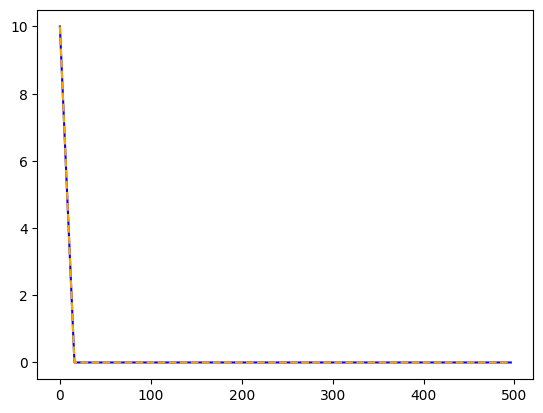

In [14]:
random_dic = random_failure(graph)
targeted_dic = targeted_failure(graph)

#verifier que nos dictionnaires ont bien les data
print("Suppressions aléatoires:", random_dic)
print("Suppressions ciblées:", targeted_dic)

x_random, y_random = random_dic.keys(), random_dic.values()
x_target, y_target = targeted_dic.keys(), targeted_dic.values()

plt.plot(x_random, y_random, label='Suppressions aléatoires', linestyle='-', color='blue')
plt.plot(x_target, y_target, label='Suppressions ciblées', linestyle='--', color='orange')


### Question 6

Do the same thing but now with targeted (closeness and betweenness based) failures


In [15]:

def closeness_centrality(graph, node):
    # Calcule la centralité de proximité pour un nœud donné dans le graphe
    visited = set()
    visited.add(node)
    queue = [node]
    total_distance = 0
    while queue:
        current_node = queue.pop(0)
        neighbors = set(graph[current_node]) - visited
        queue.extend(neighbors)
        total_distance += len(neighbors)
        visited.update(neighbors)
    closeness = 0 if total_distance == 0 else 1 / total_distance
    return closeness

def betweenness_centrality(graph, node):
    # Initialise un dictionnaire 'paths' avec le node actuel comme clé et une valeur initiale de 1.
    paths = {node: 1}

    # Initialise une pile avec le node actuel.
    stack = [node]

    # Boucle tant que la pile n'est pas vide.
    while stack:
        # Retire le dernier nœud de la pile.
        current_node = stack.pop()

        # Itère sur les voisins du nœud actuel dans le graphe.
        for neighbor in graph[current_node]:
            # Vérifie si le voisin n'est pas déjà dans le dictionnaire 'paths'.
            if neighbor not in paths:
                # Si le voisin n'est pas dans 'paths', initialise sa valeur à 0.
                paths[neighbor] = 0

                # Ajoute le voisin à la pile pour exploration ultérieure.
                stack.append(neighbor)

            # Incrémente la valeur du voisin en ajoutant la valeur du nœud actuel.
            paths[neighbor] += paths[current_node]

    # Retourne le dictionnaire 'paths' mis à jour.
    return paths


def remove_nodes_by_closeness(graph, ns):
    # Obtient les nœuds ordonnés par centralité de proximité décroissante
    nodes_ordered_by_closeness = sorted(graph, key=lambda node: closeness_centrality(graph, node), reverse=True)
    
    # Sélectionne les premiers ns nœuds à supprimer
    nodes_to_remove = nodes_ordered_by_closeness[:ns]

    temp = copy.deepcopy(graph)

    for node1 in nodes_to_remove:
        for node2 in temp[node1]:
            temp[node2].remove(node1)

        temp.pop(node1)

    return temp

def remove_nodes_by_betweenness(graph, ns):
    # Obtient les nœuds ordonnés par centralité d'intermédiarité décroissante
    nodes_ordered_by_betweenness = sorted(graph, key=lambda node: sum(betweenness_centrality(graph, node).values()), reverse=True)
    
    # Sélectionne les premiers ns nodes à supprimer
    nodes_to_remove = nodes_ordered_by_betweenness[:ns]

    temp = copy.deepcopy(graph)

    for node1 in nodes_to_remove:
        for node2 in temp[node1]:
            temp[node2].remove(node1)

        temp.pop(node1)

    return temp

def robustness_analysis_by_closeness(graph, max_nodes_removed=500, step=16):
    # Vérifie la validité de la représentation du graphe
    if not isinstance(graph, dict) or not all(isinstance(node, list) for node in graph.values()):
        raise ValueError("Représentation du graphe invalide.")

    robust_dic_closeness = {}

    # Itération sur le nombre de nodes supprimés
    for ns in range(0, max_nodes_removed, step):
        print(f"Traitement de l'itération {ns}/{max_nodes_removed}")
        
        # Suppressions ciblées basées sur la centralité de proximité
        tmp_closeness = remove_nodes_by_closeness(graph, ns)
        
        # Calcul de la taille du plus grand composant connexe
        lcc_s_closeness = lcc_size(tmp_closeness)
        
        # Stockage des résultats
        robust_dic_closeness[ns] = lcc_s_closeness

    return robust_dic_closeness

def robustness_analysis_by_betweenness(graph, max_nodes_removed=500, step=16):
    # Vérifie la validité de la représentation du graphe
    if not isinstance(graph, dict) or not all(isinstance(node, list) for node in graph.values()):
        raise ValueError("Représentation du graphe invalide.")

    robust_dic_betweenness = {}

    # Itération sur le nombre de nodes supprimés
    for ns in range(0, max_nodes_removed, step):
        print(f"Traitement de l'itération {ns}/{max_nodes_removed}")
        
        # Suppressions ciblées basées sur la centralité d'intermédiarité
        tmp_betweenness = remove_nodes_by_betweenness(graph, ns)
        
        # Calcul de la taille du LCC
        lcc_s_betweenness = lcc_size(tmp_betweenness)
        
        # Stockage des résultats
        robust_dic_betweenness[ns] = lcc_s_betweenness

    return robust_dic_betweenness


Traitement de l'itération 0/500
Traitement de l'itération 16/500
Traitement de l'itération 32/500
Traitement de l'itération 48/500
Traitement de l'itération 64/500
Traitement de l'itération 80/500
Traitement de l'itération 96/500
Traitement de l'itération 112/500
Traitement de l'itération 128/500
Traitement de l'itération 144/500
Traitement de l'itération 160/500
Traitement de l'itération 176/500
Traitement de l'itération 192/500
Traitement de l'itération 208/500
Traitement de l'itération 224/500
Traitement de l'itération 240/500
Traitement de l'itération 256/500
Traitement de l'itération 272/500
Traitement de l'itération 288/500
Traitement de l'itération 304/500
Traitement de l'itération 320/500
Traitement de l'itération 336/500
Traitement de l'itération 352/500
Traitement de l'itération 368/500
Traitement de l'itération 384/500
Traitement de l'itération 400/500
Traitement de l'itération 416/500
Traitement de l'itération 432/500
Traitement de l'itération 448/500
Traitement de l'itérat

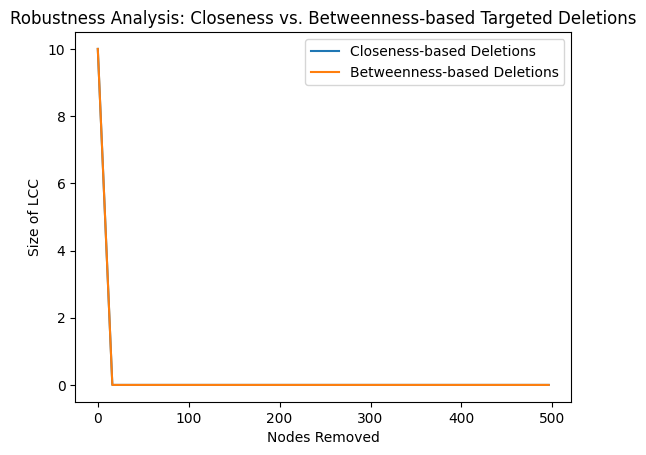

In [16]:
# Analyse pour closeness-based failures
robustness_results_closeness = robustness_analysis_by_closeness(graph)

# Analyse pour betweenness-based failures
robustness_results_betweenness = robustness_analysis_by_betweenness(graph)

# Représentation
x_closeness, y_closeness = robustness_results_closeness.keys(), robustness_results_closeness.values()
x_betweenness, y_betweenness = robustness_results_betweenness.keys(), robustness_results_betweenness.values()

plt.plot(x_closeness, y_closeness, label='Closeness-based Deletions')
plt.plot(x_betweenness, y_betweenness, label='Betweenness-based Deletions')

plt.xlabel('Nodes Removed')
plt.ylabel('Size of LCC')
plt.title('Robustness Analysis: Closeness vs. Betweenness-based Targeted Deletions')
plt.legend()
plt.show()

### Question 7

Which measure is the fastest one to disconnect the network?


### Answer
The measure that seems to be the fastest regarding the execution time is the betweeness-centrality.